# Simple Linear Regression from Scrach in Python

In the Jupyter Notebook, a simple linear regression machine learning algorithm using Python programming is implemented from scratch for educational purposes. The linear regression model makes predictions about a person's salary. If an employee has more experience, the higher output salary is predicted from the model. The less experience an employee has, the lower the salary output prediction from the model. The ScikitLearn machine learning library with NumPy, Matplotlib, Pandas and Scipy has been used to pre-process the data and evaluate performance metrics from the linear regression model.

The ScikitLearn linear regression algorithm has been implemented at the end of the Jupyter Notebook to compare the evaluation test results against the Python simple linear regression algorithm.

Although this is a very small dataset for a statistical model to make predictions on, it provides an introduction to machine learning algorithms and automatic differentiation. A larger dataset may return missing values (NaN) as output predictions over other simple linear regression algorithms written in software using well-optimised machine learning libraries such as ScikitLearn, Pytorch or TensorFlow. Larger datasets require optimised data loading software that is not added to the simple linear regression model object to reduce code complexity for educational purposes.

# 1. SImple Linear Regression Object

In [1]:
# Imports the NumPy library to use in the Jupyter Notebook
import numpy as np
 
# Simple Linear Regression Pyhton class object
class SimpleLinearRegression:
    
    """Linear Regression (LR) model in Python from scratch.
       The code comments throughout the LR model explain the code.
       x: features from the dataset
       y: prediction targets from the dataset
       Learning Rate (lr), default setting 0.01
       Number of Iterations (n_iters), default setting 1000
       lr and n_iters can be set as hyperparameters to train the 
       Simple Linear Regression model.
    """

    # Simple Linear Regression Python object constructor
    def __init__(self, x , y, lr=0.01, n_iters=1000):
        self.features = x              # Stores features from the dataset   
        self.target = y                # Stores the target y from the dataset
        self.lr = lr                   # Learning rate
        self.n_iters =n_iters          # Number of iterations
        self.weights = 0               # Initialises the weights to 0
        self.bias = 0                  # Initialises the bias to 0
        self.n_samples = len(x)        # Sets the number of samples to the length
         
    # Python method to fit the data to the Linear Regression model
    def fit(self):
        
        """Python fit method to fit the training data to the LR model.
           The training data is passed through the LR model in the forward
           and backward pass directions because gradient descent adjusts the
           weight parameters during training to train the model"""
         
        # Gradient Descent implementation
        for i in range(self.n_iters):
            
            # Stores the predictions of the LR model during training
            y_pred = self.weights * self.features + self.bias
             
            # Stores the weights and the bias of the LR model after calculation
            dw = (-2/self.n_samples)*sum(self.features * (self.target - y_pred))
            db = (-1/self.n_samples)*sum(self.target-y_pred)
             
            # Updates the weights and the bias of the LR during training
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
             
    # Python predict method for the LR algorithm
    def predict(self , X):
        
        """Python predict method to run the test data through the model in the 
           forward pass direction only during inference mode"""
        
        # Stores the prediction from the LR model
        y_pred = self.weights * X + self.bias
        
        # Returns the prediction made from the LR model
        return y_pred

# 2. Load the Dataset

Dataset Available from Kaggle:

https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

In [2]:
# Imports the Pandas library to use in the Jupyter Notebook
import pandas as pd

# Loding the data
df = pd.read_csv('Salary_dataset.csv')

df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [3]:
# Seperate the X dataset of features
X = df.iloc[:,1:2]

X

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [4]:
# Seperate the target values from the dataset
y  = df.iloc[:,2:3]

y

,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0
5,56643.0
6,60151.0
7,54446.0
8,64446.0
9,57190.0


# 3. Normalise the Data

In [5]:
# Imports the StandardScaler object from ScikitLearn
from sklearn.preprocessing import StandardScaler

# Normalises the data features with ScikitLearn StandardScaler object
# Creates the StandardScaler object from ScikitLearn
scaler = StandardScaler().fit(X)

# Fits the normalisation for the model
X = scaler.transform(X)

X

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

# 3. Train Test Split

In [6]:
# Imports the train test split method from ScikitLearn
from sklearn.model_selection import train_test_split

# Carry out a train, test split from ScikitLearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prints out the X_train features to the screen
X_train

array([[ 1.78721455],
       [ 1.21377673],
       [-0.47069688],
       [-1.51005294],
       [-1.11581443],
       [-0.07645838],
       [-0.86493538],
       [-0.43485702],
       [-0.47069688],
       [ 0.92705781],
       [-1.43837321],
       [-1.36669348],
       [ 1.32129632],
       [-1.18749416],
       [ 0.6403389 ],
       [ 1.50049564],
       [ 0.21026054],
       [ 1.85889428],
       [ 0.53281931],
       [-0.75741579],
       [-0.50653674],
       [-0.29149756],
       [ 0.2461004 ],
       [-0.82909552]])

In [7]:
# Converts the y_train features from a DataFrame to a NumPy array
y_train = y_train.values
 
y_train

array([[122392.],
       [109432.],
       [ 56958.],
       [ 39344.],
       [ 39892.],
       [ 66030.],
       [ 56643.],
       [ 57082.],
       [ 55795.],
       [101303.],
       [ 46206.],
       [ 37732.],
       [105583.],
       [ 43526.],
       [ 98274.],
       [116970.],
       [ 81364.],
       [121873.],
       [ 91739.],
       [ 54446.],
       [ 63219.],
       [ 61112.],
       [ 93941.],
       [ 60151.]])

In [8]:
# Prints out the X_test features to the screen
X_test

array([[ 1.5363355 ],
       [-0.1481381 ],
       [ 1.03457741],
       [-0.00477865],
       [-0.75741579],
       [-0.57821647]])

In [9]:
# Converts the y_test features from a DataFrame to a NumPy array
y_test = y_test.values
    
y_test

array([[112636.],
       [ 67939.],
       [113813.],
       [ 83089.],
       [ 64446.],
       [ 57190.]])

# 4. Plot the Dataset Features (X_test) Against the Targets (y_test)

Text(0, 0.5, 'Salary (£)')

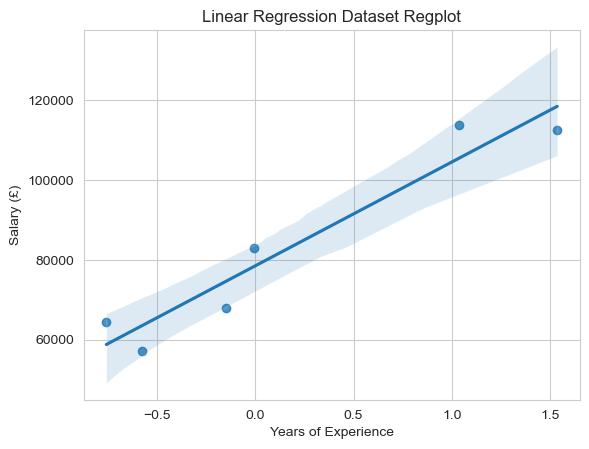

In [10]:
# Imports the Matplotlib and Seaborn modules for plotting in the Jupyter Notebook
import matplotlib.pyplot as plt
import seaborn as sns

# Sets the style of the line plot to whitegrid colour
sns.set_style('whitegrid')

# Stores the plot values in the axes variable and plots the line graph
axes = sns.regplot(x=X_test, y=y_test)

# Sets the title, x-axis label and the y-axis labels of the plot
plt.title('Linear Regression Dataset Regplot')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (£)')

# 5. Train the Linear Regression Model

In [11]:
# Creating the SimpleLinearRegression class object
regressor = SimpleLinearRegression(X_train, y_train, lr=0.01, n_iters=1000)
 
# Train the model with the fit method
regressor.fit()

# 6. Make Predictions on the Test Dataset

In [12]:
# Makes predictions on the test dataset X_test
y_pred = regressor.predict(X_test)

y_pred

array([[115787.38545954],
       [ 71495.90787825],
       [102594.1793715 ],
       [ 75265.39533198],
       [ 55475.58619991],
       [ 60187.44551707]])

# 7. Flatten the 2D NumPy Array to a 1D NumPy Array

In [13]:
# Flattens the 2D pred array to 1D from the model and stores it in the flat Python variable
flat = y_pred.flatten()

flat

array([115787.38545954,  71495.90787825, 102594.1793715 ,  75265.39533198,
        55475.58619991,  60187.44551707])

In [14]:
# Prints out the y_test variable to the screen
y_test

array([[112636.],
       [ 67939.],
       [113813.],
       [ 83089.],
       [ 64446.],
       [ 57190.]])

In [15]:
# Flattens the y_test 2D array to 1D and stores it in the y variable
y = y_test.flatten()

y

array([112636.,  67939., 113813.,  83089.,  64446.,  57190.])

# 8. PLCC, SRCC and KRCC Correlation Performance Metrics Method

In [16]:
# Python method to calculate correlation coefficient metrics
def correlation(X, y):
    
    # Import Scipy libraray
    import scipy.stats
    
    # Calculate Pearson's Linear Correlation Coefficient with Scipy
    PLCC = scipy.stats.pearsonr(X, y)[0]    # Pearson's r

    # Calculate Spearman Rank Correlation Coefficient (SRCC) with Scipy
    SRCC = scipy.stats.spearmanr(X, y)[0]   # Spearman's rho

    # Calculate Kendalls Rank Correlation Coefficient (KRCC) with Scipy
    KRCC = scipy.stats.kendalltau(X, y)[0]  # Kendall's tau
    
    # Prints out the correlation performance metric results to the screen
    print("PLCC: ", PLCC)
    print("SRCC: ", SRCC)
    print("KRCC: ", KRCC)

# 9. Evaluate PLCC, SRCC and KRCC Performance Metrics

In [17]:
# Calls the correlation coefficient Python method to calculate PLCC, SRCC, and KRCC
# with SciPy
correlation(flat, y)

PLCC:  0.9595453701413408
SRCC:  0.8857142857142858
KRCC:  0.7333333333333333


# Root Mean Square Error (RMSE)

In [18]:
# Imports the mean_squared_error method from ScikitLearn
from sklearn.metrics import mean_squared_error

# Calls the Mean Squared Error method from ScikitLearn
rmse = mean_squared_error(flat, y)

# Prints out the RMSE value to the screen
np.sqrt(rmse)

7060.5305942931345

# R2 Score

In [19]:
# Imports the r2_score method from ScikitLearn
from sklearn.metrics import r2_score

# Calls the R2 Score method from ScikitLearn
r2 = r2_score(flat, y)

# Prints out the R2 Score value to the screen
r2

0.8961380006182991

# 10. Plot the Test Predictions

Text(0, 0.5, 'Salary (£)')

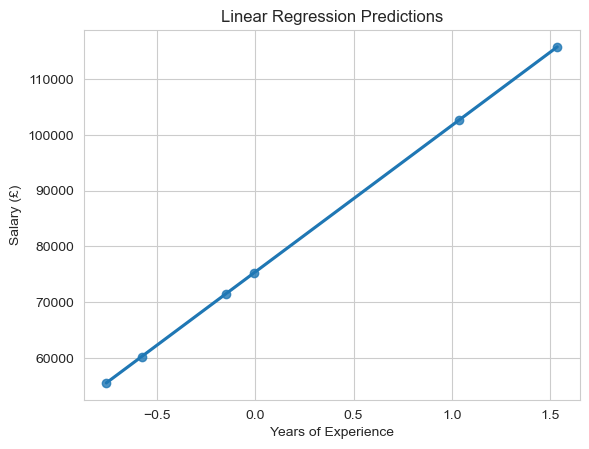

In [20]:
# Sets the style of the line plot to whitegrid colour
sns.set_style('whitegrid')

# Stores the plot values in the axes variable and plots the line graph
axes = sns.regplot(x=X_test, y=y_pred)

# Sets the title, x-axis label and the y-axis labels of the plot
plt.title('Linear Regression Predictions')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (£)')

# 11. Test on the ScikitLearn Linear Regression Model

In [21]:
# Imports the Linear Regression model from ScikitLearn
from sklearn.linear_model import LinearRegression

# Trains the ScikitLEarn Linear Regression model
reg = LinearRegression().fit(X_train, y_train)

In [22]:
# Outputs the regression score to the screen
reg.score(X_train, y_train)

0.9645401573418148

In [23]:
# Prints out the regression coefficient to the screen from the ScikitLearn Linear Regression model
reg.coef_

array([[26294.22737194]])

In [24]:
# Prints out the regression intercept to the screen from the ScikitLearn Linear Regression model
reg.intercept_

array([75394.45509481])

# 12. Make Predictions

In [25]:
# Makes predictions on the Linear Regression model
y_pred = reg.predict(X_test)

y_pred

array([[115791.21011287],
       [ 71499.27809463],
       [102597.86866063],
       [ 75268.80422384],
       [ 55478.79204548],
       [ 60190.69970699]])

In [26]:
# Flattens the 2D pred array to 1D from the model and stores it in the flat Python variable
flat = y_pred.flatten()

flat

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

In [27]:
# Prints out the y_test variable to the screen
y_test

array([[112636.],
       [ 67939.],
       [113813.],
       [ 83089.],
       [ 64446.],
       [ 57190.]])

In [28]:
# Flattens the y_test 2D array to 1D and stores it in the y variable
y = y_test.flatten()

y

array([112636.,  67939., 113813.,  83089.,  64446.,  57190.])

# 13. Test the ScikitLearn Linear Regression Model

In [29]:
# Calls the correlation coefficient Python method to calculate PLCC, SRCC, and KRCC
# with SciPy
correlation(flat, y)

PLCC:  0.9595453701413408
SRCC:  0.8857142857142858
KRCC:  0.7333333333333333


# 14. Plot the Test Predictions

Text(0, 0.5, 'Salary (£)')

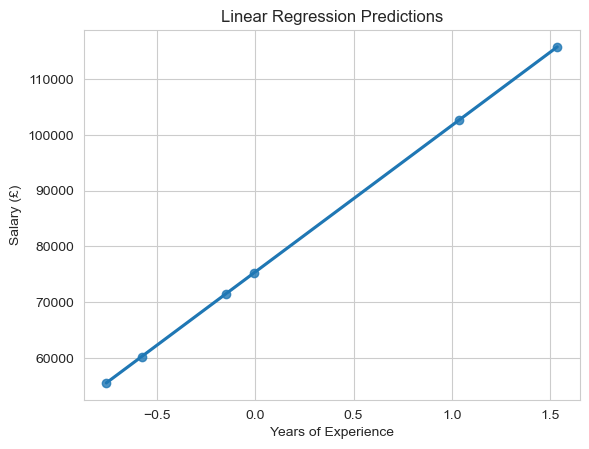

In [30]:
# Sets the style of the line plot to whitegrid colour
sns.set_style('whitegrid')

# Stores the plot values in the axes variable and plots the line graph
axes = sns.regplot(x=X_test, y=y_pred)

# Sets the title, x-axis label and the y-axis labels of the plot
plt.title('Linear Regression Predictions')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (£)')

# 15. Display Jupyter Notebook Python Variables

In [31]:
# Prints out all the Python variables from the Jupyter Notebook
%whos

Variable                 Type                      Data/Info
------------------------------------------------------------
LinearRegression         ABCMeta                   <class 'sklearn.linear_mo<...>._base.LinearRegression'>
SimpleLinearRegression   type                      <class '__main__.SimpleLinearRegression'>
StandardScaler           type                      <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                        ndarray                   30x1: 30 elems, type `float64`, 240 bytes
X_test                   ndarray                   6x1: 6 elems, type `float64`, 48 bytes
X_train                  ndarray                   24x1: 24 elems, type `float64`, 192 bytes
axes                     AxesSubplot               AxesSubplot(0.125,0.11;0.775x0.77)
correlation              function                  <function correlation at 0x0000020886B43E50>
df                       DataFrame                     Unnamed: 0  YearsExpe<...>           10.6  121873.0
flat  